# Data visualization tennis - Homme

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True)  
%matplotlib inline

In [2]:
men_df = pd.read_csv('https://s3-eu-west-1.amazonaws.com/nibble-datasets/tennis/mens_train_file.csv')
men_df.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,id,train,outcome,gender
0,4,1,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,...,12.5628,2.0724,True,F,0.445318,False,5718,1,UE,mens
1,4,2,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,...,12.3544,5.1124,False,B,0.432434,False,371,1,FE,mens
2,23,1,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,...,13.8620,1.6564,False,F,0.397538,True,7948,1,FE,mens
3,9,1,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,...,14.2596,0.1606,True,B,0.671984,True,9312,1,UE,mens
4,4,1,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,...,11.3658,1.1082,False,F,0.340411,False,7667,1,W,mens


## Répartition des points par type de tir

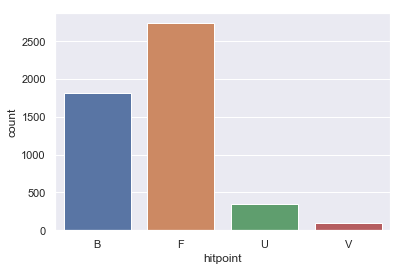

In [3]:
sns.countplot(x="hitpoint", data=men_df);

## Répartition des points par catégorie de tir

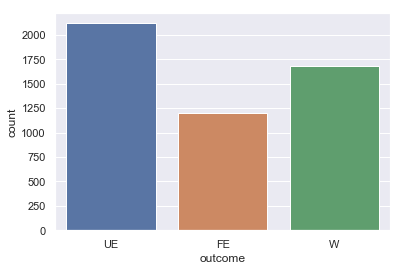

In [4]:
sns.countplot(x="outcome", data=men_df);

## Différence de vitesse entre dernier & avant dernier coup

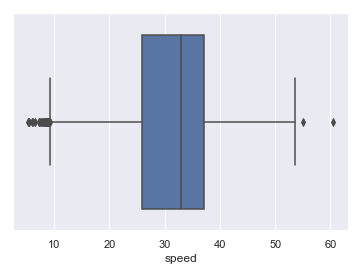

In [5]:
speed_boxplot = sns.boxplot(x=men_df['speed'])

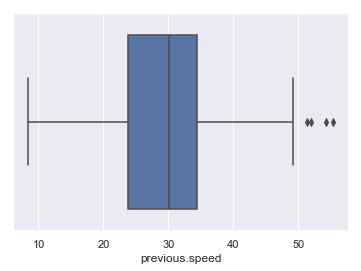

In [6]:
previous_speed_boxplot = sns.boxplot(x=men_df['previous.speed'])

## Positionnement du gagnant par rapport au filet & la ligne centrale lors du dernier coup, tout type de coup confondu

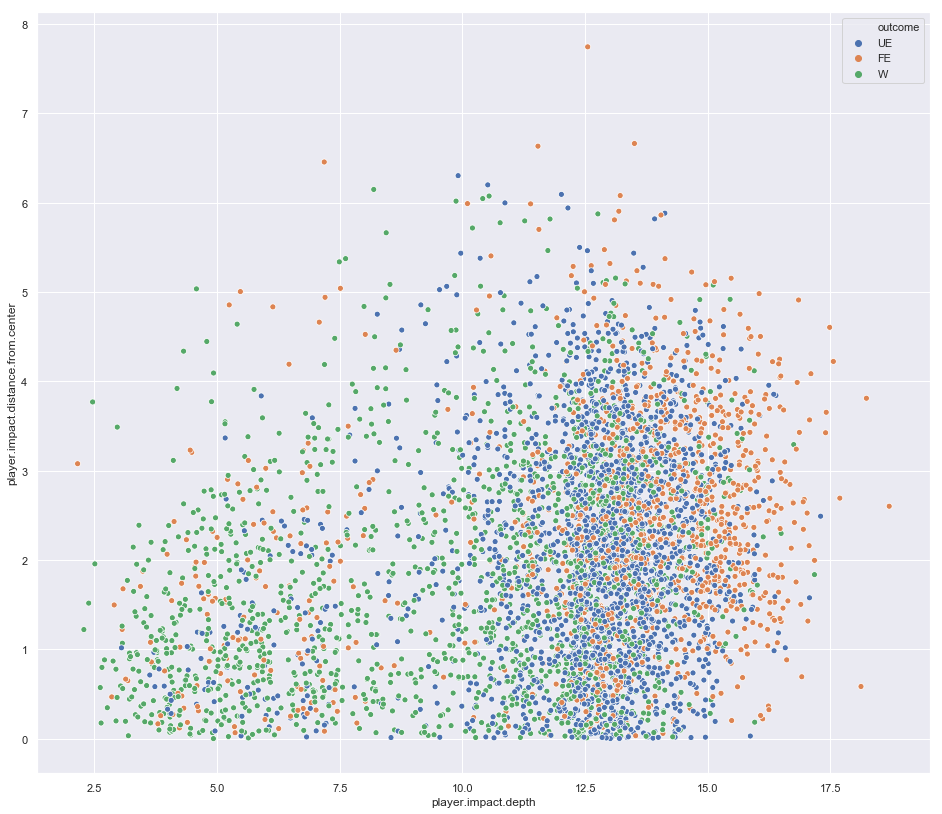

In [38]:
plt.figure(figsize=(16, 14))
sns.scatterplot(x="player.impact.depth", y="player.impact.distance.from.center", hue="outcome", data=men_df);

## Vitesse du dernier coup gagnant

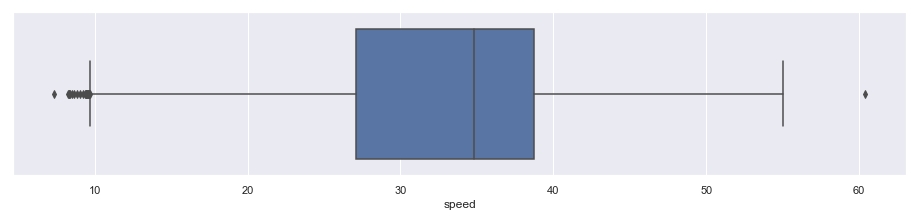

In [31]:
winning = men_df['outcome'] == 'W'
winning_df = men_df.loc[winning]

plt.figure(figsize=(16, 3))
winning_speed_boxplot = sns.boxplot(x=winning_df['speed'])

## Positionnement du gagnant par rapport au filet & la ligne centrale lors dernier du coup gagnant

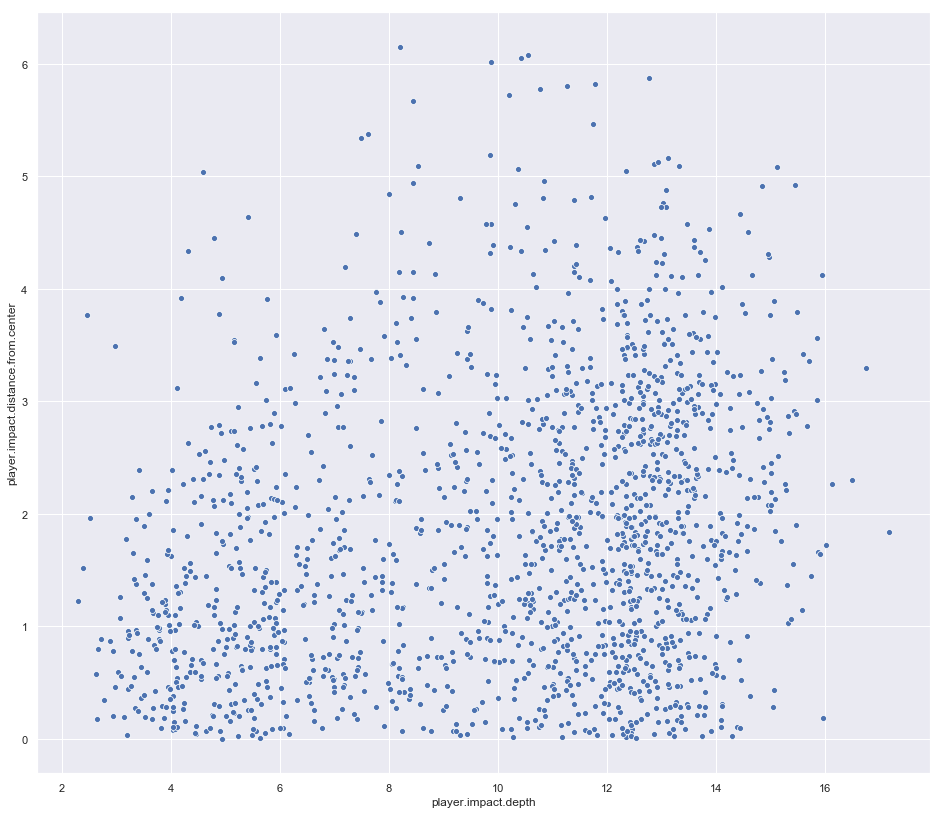

In [32]:
winning_pos_df = pd.DataFrame()
winning_pos_df['player.impact.distance.from.center'] =  winning_df['player.impact.distance.from.center']
winning_pos_df['player.impact.depth'] = winning_df['player.impact.depth']

plt.figure(figsize=(16, 14))
sns.scatterplot(x="player.impact.depth", y="player.impact.distance.from.center", data=winning_pos_df);

## Positionnement du perdant par rapport au filet & la ligne centrale lors de l'avant dernier coup lorsque dernier coup == W

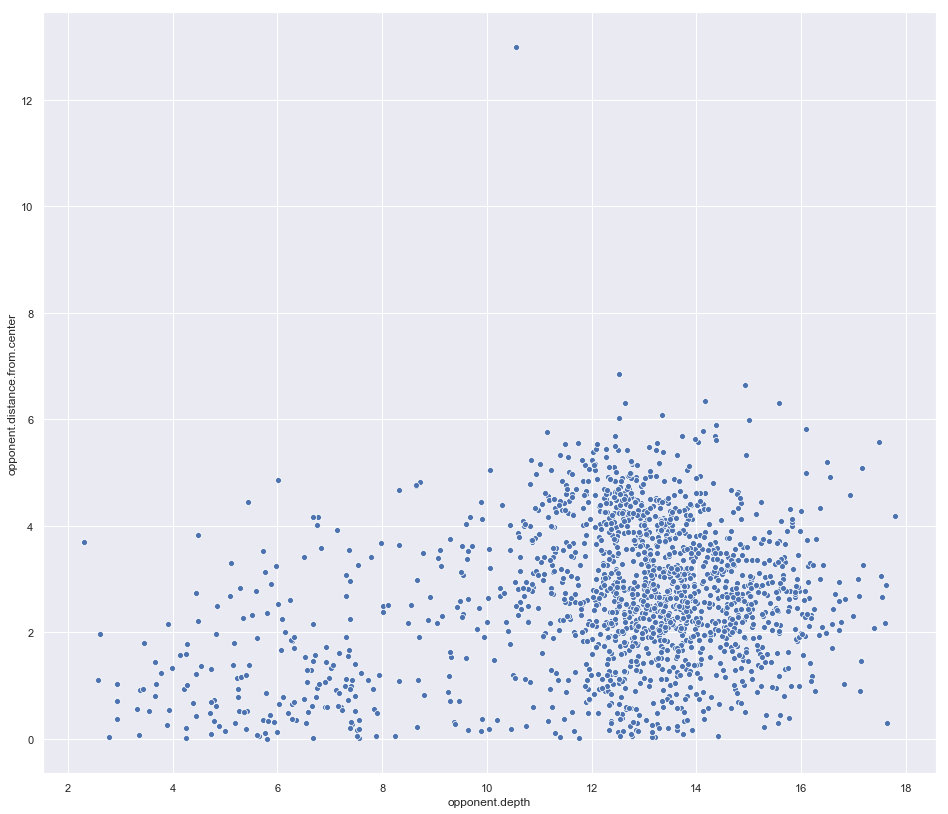

In [40]:
losing_pos_df = pd.DataFrame()
losing_pos_df['opponent.distance.from.center'] =  winning_df['opponent.distance.from.center']
losing_pos_df['opponent.depth'] = winning_df['opponent.depth']

plt.figure(figsize=(16, 14))
sns.scatterplot(x="opponent.depth", y="opponent.distance.from.center", data=losing_pos_df);